# KC House Pricing Project


In [152]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from scipy.optimize import curve_fit

%matplotlib inline

## Exploring Data Frame and Cleaning Up Null Values

In [153]:
df = pd.read_csv('data/kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Make Grade only Numeric

In [155]:
# Create a new dataframe using genres listed in my existing data frame. 
grade_df = df['grade'].str.split(' ', expand = True)
#Set the column names
grade_df.rename(columns = {0 : 'numerical_grade'}, inplace = True)
grade_df.drop([1 , 2], axis = 1, inplace = True)
grade_df
# Add the expanded columns back to the original df
df = df.merge(grade_df, right_index = True, left_index = True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,numerical_grade
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,7
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,7
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,6
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,7
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,8
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,8
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,7
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,8


### Fill in null values with the null values associated to the column

In [156]:
df['waterfront'].fillna('NO', inplace=True)
df['yr_renovated'].fillna(0.0, inplace=True)
df['view'].fillna('NONE', inplace = True)

### Replace View Column with numeric Values

In [157]:
view_map = {'EXCELLENT':5, 'GOOD':4, 'AVERAGE':3, 'FAIR':2, 'NONE':1, np.nan:0}
df['view_num'] = df['view'].map(view_map)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,numerical_grade,view_num
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,7,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,7,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,6,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,7,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,8,1
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,8,1
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,7,1
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,8,1


### Create New Categorical Column for Good View

In [158]:
df['good_view'] = 0

df['good_view'].loc[df['view_num'] >= 3] = 1

C:\Users\wjsdn\AppData\Local\Temp\ipykernel_33564\2456017282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['good_view'].loc[df['view_num'] >= 3] = 1


In [159]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,numerical_grade,view_num,good_view
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,1955,0.0,98178,47.5112,-122.257,1340,5650,7,1,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,7,1,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,1933,0.0,98028,47.7379,-122.233,2720,8062,6,1,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,47.5208,-122.393,1360,5000,7,1,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1987,0.0,98074,47.6168,-122.045,1800,7503,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,2009,0.0,98103,47.6993,-122.346,1530,1509,8,1,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2014,0.0,98146,47.5107,-122.362,1830,7200,8,1,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,2009,0.0,98144,47.5944,-122.299,1020,2007,7,1,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,2004,0.0,98027,47.5345,-122.069,1410,1287,8,1,0


In [160]:
df = df.sort_values('long')
df['long']

13873   -122.519
9289    -122.515
2962    -122.514
1166    -122.512
6096    -122.511
          ...   
13236   -121.321
10886   -121.319
13059   -121.316
4199    -121.315
2925    -121.315
Name: long, Length: 21597, dtype: float64

### Add Zipcode Data

Data is from: https://www.point2homes.com/US/Neighborhood/WA/King-County-Demographics.html#MedianIncomeByZipcaode

In [161]:
df_income = pd.read_csv('data/kc_zipcode_data.csv')
df_income.head()

,ZipCode,Population,Number of Households,Median Income,Average Income
0,98001,"34,455","11,648","$88,962.00","$102,586.00"
1,98002,"33,947","13,162","$59,097.00","$70,945.00"
2,98003,"49,445","18,515","$59,560.00","$76,753.00"
3,98004,"37,265","17,460","$142,173.00","$210,129.00"
4,98005,"21,414","8,590","$135,225.00","$186,020.00"


In [162]:
# Rename zipcode to match existing datafram
df_income.rename(columns = {'ZipCode': 'zipcode'}, inplace=True) 
# Merge the dataframes together
df = df.merge(df_income, how = 'left', on = 'zipcode')

In [163]:
# Get rid of commas in our new data
df['Median Income']=df['Median Income'].str.replace(',','')
df['Average Income']=df['Average Income'].str.replace(',','')
df['Number of Households']=df['Number of Households'].str.replace(',','')
df['Population']=df['Population'].str.replace(',','')
df['Population']=df['Population'].str.replace(',','')

#Get rid of dollar signs in our new data
df['Median Income']=df['Median Income'].str.replace('$','')
df['Average Income']=df['Average Income'].str.replace('$','')


C:\Users\wjsdn\AppData\Local\Temp\ipykernel_33564\3648930856.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Median Income']=df['Median Income'].str.replace('$','')
C:\Users\wjsdn\AppData\Local\Temp\ipykernel_33564\3648930856.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Average Income']=df['Average Income'].str.replace('$','')


In [164]:
# Turn our new data into floats so we can use it for regression analysis
df['Median Income'] = df['Median Income'].astype('float64')
df['Average Income'] = df['Average Income'].astype('float64')
df['Number of Households'] = df['Number of Households'].astype('float64')
df['Population'] = df['Population'].astype('float64')

In [165]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,numerical_grade,view_num,good_view,Population,Number of Households,Median Income,Average Income
0,3522029124,12/3/2014,575000.0,3,2.00,2690,435600,2.0,NO,NONE,...,-122.519,1700,163350,8,1,0,10400.0,4665.0,78368.0,114785.0
1,1422029138,9/2/2014,565000.0,3,2.50,2030,217805,1.0,NO,NONE,...,-122.515,1870,109468,9,1,0,10400.0,4665.0,78368.0,114785.0
2,2322029048,11/19/2014,999000.0,3,2.75,2830,505166,1.0,YES,GOOD,...,-122.514,2120,21988,8,4,1,10400.0,4665.0,78368.0,114785.0
3,3523029041,10/9/2014,290000.0,2,0.75,440,8313,1.0,YES,GOOD,...,-122.512,880,26289,5,4,1,10400.0,4665.0,78368.0,114785.0
4,222029026,9/17/2014,340000.0,2,0.75,1060,48292,1.0,YES,AVERAGE,...,-122.511,750,80201,6,3,1,10400.0,4665.0,78368.0,114785.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,8649400410,4/17/2015,375000.0,3,1.75,2140,13598,1.5,NO,NONE,...,-121.321,930,10150,7,1,0,7200.0,2773.0,118808.0,150458.0
21593,8649401000,10/22/2014,241000.0,2,1.75,1070,9750,1.5,NO,NONE,...,-121.319,970,9750,7,1,0,7200.0,2773.0,118808.0,150458.0
21594,1437500035,10/10/2014,155000.0,2,1.00,1010,43056,1.5,NO,NONE,...,-121.316,830,18297,5,1,0,7200.0,2773.0,118808.0,150458.0
21595,1437500015,7/9/2014,150000.0,3,0.75,490,38500,1.5,NO,NONE,...,-121.315,800,18297,5,1,0,7200.0,2773.0,118808.0,150458.0


## Using One Hot Encoder for Waterfront Collumn

In [166]:
# creating instance of one-hot-encoder
# Do after train test split
enc = OneHotEncoder(handle_unknown='error', drop = 'first')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df[['waterfront']]).toarray())
enc_df
# merge with main df bridge_df on key values
df = df.merge(enc_df, right_index = True, left_index = True)

In [167]:
df.rename(columns={0: "Waterfront"}, inplace = True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,numerical_grade,view_num,good_view,Population,Number of Households,Median Income,Average Income,Waterfront
0,3522029124,12/3/2014,575000.0,3,2.00,2690,435600,2.0,NO,NONE,...,1700,163350,8,1,0,10400.0,4665.0,78368.0,114785.0,0.0
1,1422029138,9/2/2014,565000.0,3,2.50,2030,217805,1.0,NO,NONE,...,1870,109468,9,1,0,10400.0,4665.0,78368.0,114785.0,0.0
2,2322029048,11/19/2014,999000.0,3,2.75,2830,505166,1.0,YES,GOOD,...,2120,21988,8,4,1,10400.0,4665.0,78368.0,114785.0,1.0
3,3523029041,10/9/2014,290000.0,2,0.75,440,8313,1.0,YES,GOOD,...,880,26289,5,4,1,10400.0,4665.0,78368.0,114785.0,1.0
4,222029026,9/17/2014,340000.0,2,0.75,1060,48292,1.0,YES,AVERAGE,...,750,80201,6,3,1,10400.0,4665.0,78368.0,114785.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,8649400410,4/17/2015,375000.0,3,1.75,2140,13598,1.5,NO,NONE,...,930,10150,7,1,0,7200.0,2773.0,118808.0,150458.0,0.0
21593,8649401000,10/22/2014,241000.0,2,1.75,1070,9750,1.5,NO,NONE,...,970,9750,7,1,0,7200.0,2773.0,118808.0,150458.0,0.0
21594,1437500035,10/10/2014,155000.0,2,1.00,1010,43056,1.5,NO,NONE,...,830,18297,5,1,0,7200.0,2773.0,118808.0,150458.0,0.0
21595,1437500015,7/9/2014,150000.0,3,0.75,490,38500,1.5,NO,NONE,...,800,18297,5,1,0,7200.0,2773.0,118808.0,150458.0,0.0


## Creating a Renovated Category

In [168]:
df['renovated'] = 0
df['renovated'].loc[df['yr_renovated'] >df['yr_built']] = 1
df

C:\Users\wjsdn\AppData\Local\Temp\ipykernel_33564\4201707868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['renovated'].loc[df['yr_renovated'] >df['yr_built']] = 1


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,numerical_grade,view_num,good_view,Population,Number of Households,Median Income,Average Income,Waterfront,renovated
0,3522029124,12/3/2014,575000.0,3,2.00,2690,435600,2.0,NO,NONE,...,163350,8,1,0,10400.0,4665.0,78368.0,114785.0,0.0,0
1,1422029138,9/2/2014,565000.0,3,2.50,2030,217805,1.0,NO,NONE,...,109468,9,1,0,10400.0,4665.0,78368.0,114785.0,0.0,0
2,2322029048,11/19/2014,999000.0,3,2.75,2830,505166,1.0,YES,GOOD,...,21988,8,4,1,10400.0,4665.0,78368.0,114785.0,1.0,0
3,3523029041,10/9/2014,290000.0,2,0.75,440,8313,1.0,YES,GOOD,...,26289,5,4,1,10400.0,4665.0,78368.0,114785.0,1.0,0
4,222029026,9/17/2014,340000.0,2,0.75,1060,48292,1.0,YES,AVERAGE,...,80201,6,3,1,10400.0,4665.0,78368.0,114785.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,8649400410,4/17/2015,375000.0,3,1.75,2140,13598,1.5,NO,NONE,...,10150,7,1,0,7200.0,2773.0,118808.0,150458.0,0.0,0
21593,8649401000,10/22/2014,241000.0,2,1.75,1070,9750,1.5,NO,NONE,...,9750,7,1,0,7200.0,2773.0,118808.0,150458.0,0.0,0
21594,1437500035,10/10/2014,155000.0,2,1.00,1010,43056,1.5,NO,NONE,...,18297,5,1,0,7200.0,2773.0,118808.0,150458.0,0.0,0
21595,1437500015,7/9/2014,150000.0,3,0.75,490,38500,1.5,NO,NONE,...,18297,5,1,0,7200.0,2773.0,118808.0,150458.0,0.0,0


## Create a Dataframe with Only numeric columns

In [169]:
df.drop(['sqft_basement', 'view', 'condition', 'date', 'id', 'grade', 'waterfront'], axis = 1, inplace = True )
df['numerical_grade'] = df['numerical_grade'].astype('float64')


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 21597 non-null  float64
 1   bedrooms              21597 non-null  int64  
 2   bathrooms             21597 non-null  float64
 3   sqft_living           21597 non-null  int64  
 4   sqft_lot              21597 non-null  int64  
 5   floors                21597 non-null  float64
 6   sqft_above            21597 non-null  int64  
 7   yr_built              21597 non-null  int64  
 8   yr_renovated          21597 non-null  float64
 9   zipcode               21597 non-null  int64  
 10  lat                   21597 non-null  float64
 11  long                  21597 non-null  float64
 12  sqft_living15         21597 non-null  int64  
 13  sqft_lot15            21597 non-null  int64  
 14  numerical_grade       21597 non-null  float64
 15  view_num           

## Creating a Heat Chart to Judge Correlation

<AxesSubplot:>

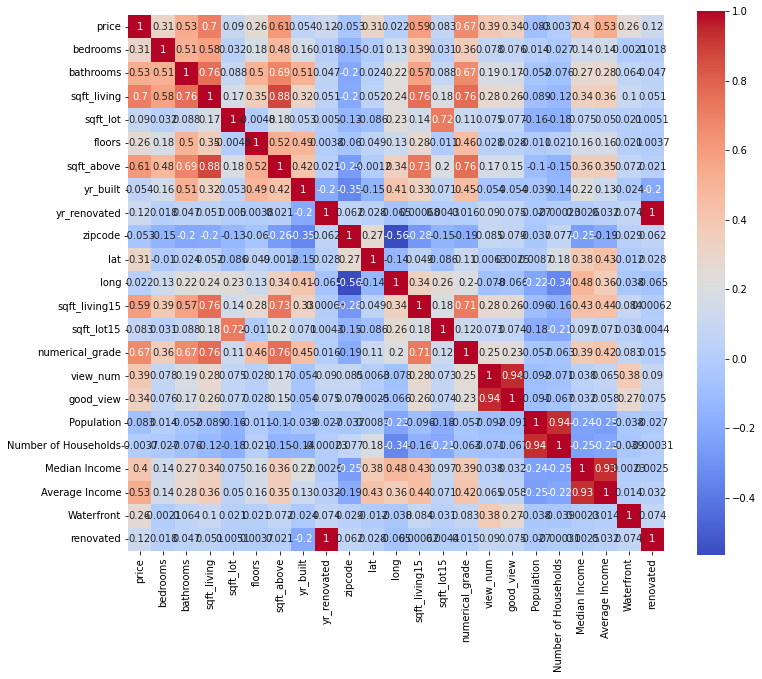

In [171]:
plt.figure(figsize = (12, 10))

sns.heatmap(df.corr(), cmap="coolwarm", annot = True, square = True)

## Examining Linearity of Potential X Variables


In [172]:
y = df['price']
X = df.drop(columns=['price'], axis=1)


In [173]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'numerical_grade', 'view_num',
       'good_view', 'Population', 'Number of Households', 'Median Income',
       'Average Income', 'Waterfront', 'renovated'],
      dtype='object')

In [174]:
df.rename(columns={"Number of Households": 'number_of_households', 'Median Income': 'median_income'
                   , 'Average Income': 'average_income'}, inplace = True)


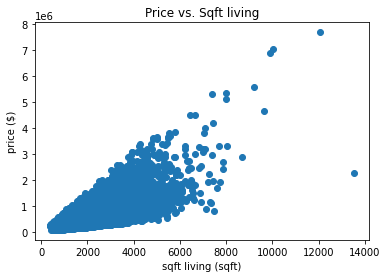

In [175]:
plt.scatter(data=df, x='sqft_living', y='price')
plt.xlabel('sqft living (sqft)')
plt.ylabel('price ($)')
plt.title('Price vs. Sqft living');

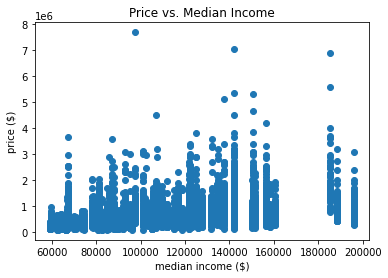

In [176]:
plt.scatter(data=df, x='median_income', y='price')
plt.xlabel('median income ($)')
plt.ylabel('price ($)')
plt.title('Price vs. Median Income');

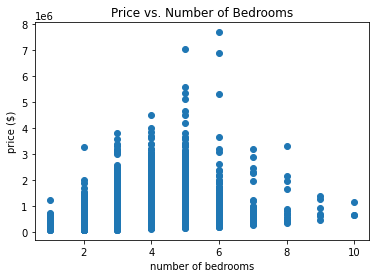

In [177]:
df_copy = df[df['bedrooms'] < 11]
plt.scatter(data=df_copy, x='bedrooms', y='price')
plt.xlabel('number of bedrooms')
plt.ylabel('price ($)')
plt.title('Price vs. Number of Bedrooms');

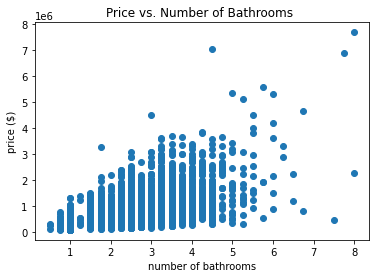

In [178]:
#df_copy = df[df['bedrooms'] < 11]
plt.scatter(data=df, x='bathrooms', y='price')
plt.xlabel('number of bathrooms')
plt.ylabel('price ($)')
plt.title('Price vs. Number of Bathrooms ');

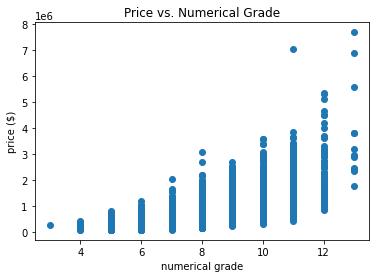

In [179]:
plt.scatter(data=df, x='numerical_grade', y='price')
plt.xlabel('numerical grade')
plt.ylabel('price ($)')
plt.title('Price vs. Numerical Grade');

# Grade Affects Price

In [180]:
grade_df = pd.read_csv('data/grade_values_final_model.csv')

In [181]:
grade_df.astype('int64')

,grade,regression_coefficient,change_from_previous_grade
0,3,-6507000,0
1,4,-6737000,-230000
2,5,-6752000,-15000
3,6,-6757000,-5000
4,7,-6740000,17000
5,8,-6706000,34000
6,9,-6606000,100000
7,10,-6461000,145000
8,11,-6207000,254000
9,12,-5740000,467000


In [182]:
grade_df['change_from_3'] = (grade_df['regression_coefficient'] - -6737000)
grade_df

,grade,regression_coefficient,change_from_previous_grade,change_from_3
0,3,-6507000,0,230000
1,4,-6737000,-230000,0
2,5,-6752000,-15000,-15000
3,6,-6757000,-5000,-20000
4,7,-6740000,17000,-3000
5,8,-6706000,34000,31000
6,9,-6606000,100000,131000
7,10,-6461000,145000,276000
8,11,-6207000,254000,530000
9,12,-5740000,467000,997000


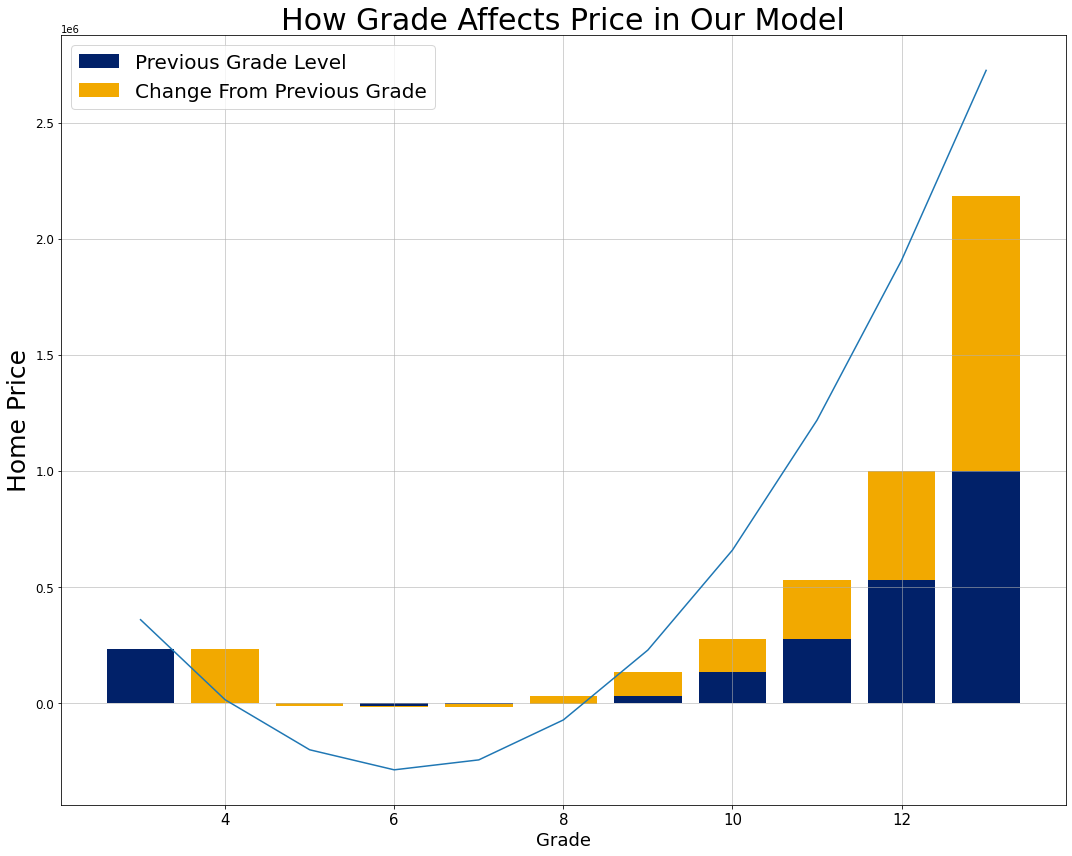

In [183]:
fig, ax = plt.subplots(figsize=(15, 12))

ax.bar(grade_df['grade'], grade_df['change_from_3'], color = '#012169', label = 'Previous Grade Level')
ax.bar(grade_df['grade'], grade_df['change_from_previous_grade'], 
       bottom = (grade_df['change_from_3'] -grade_df['change_from_previous_grade'])
                 ,color = '#F2A900', label = 'Change From Previous Grade')

plt.legend(loc="upper left", fontsize = 20)
ax.set_title('How Grade Affects Price in Our Model', fontsize = 30)
ax.set_xlabel('Grade', fontsize = 18)
ax.set_ylabel('Home Price', fontsize = 25)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=12)
ax.grid(which = 'major', alpha = .7)

def func(x, a, b, c):
   return a + b*x + c*x*x # example function


# curve fit the data using curve_fit's default inital parameter estimates
fittedParameters, pcov = curve_fit(func, grade_df['grade'], grade_df['change_from_previous_grade']+grade_df['change_from_3'])

y_fit = func(grade_df['grade'], *fittedParameters)

#plt.bar(grade_df['grade'], grade_df['change_from_previous_grade']) # plot the raw data as bar chart
plt.plot(grade_df['grade'], y_fit) # plot the equation using the fitted parameters

plt.tight_layout()

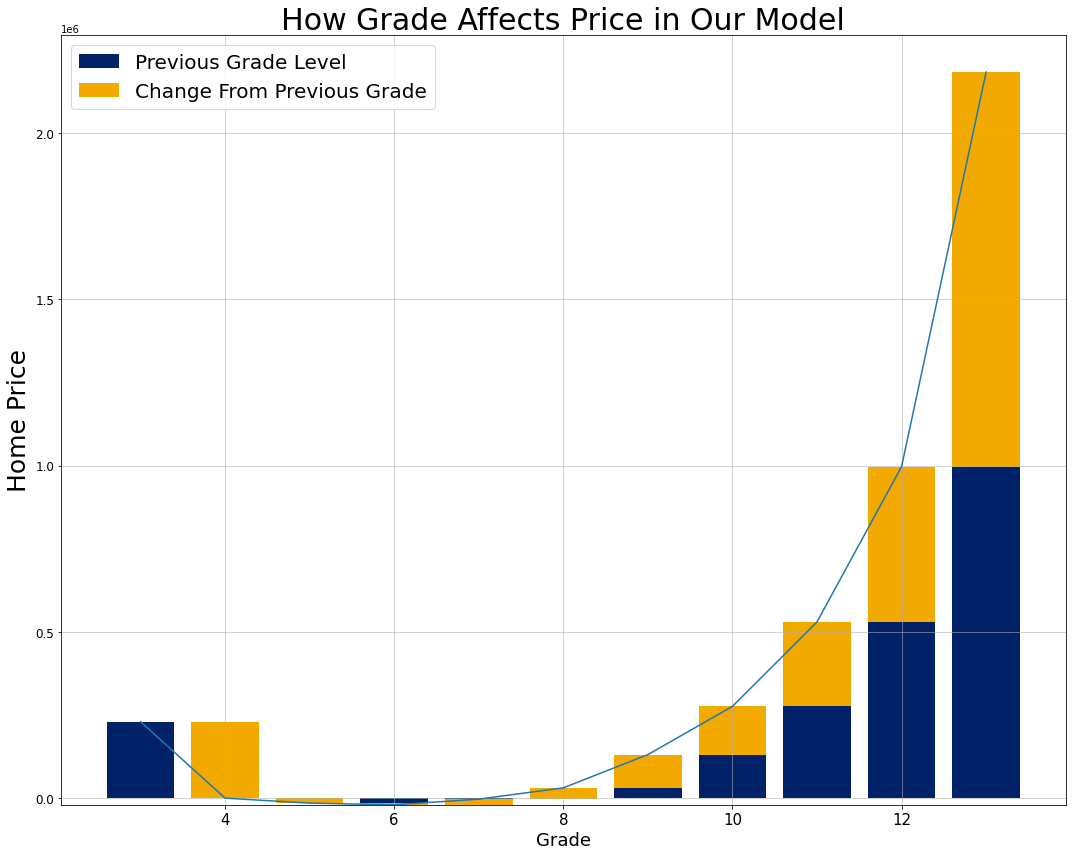

In [184]:
fig, ax = plt.subplots(figsize=(15, 12))
ax.bar(grade_df['grade'], grade_df['change_from_3'], color = '#012169', label = 'Previous Grade Level')
ax.bar(grade_df['grade'], grade_df['change_from_previous_grade'],
       bottom = (grade_df['change_from_3'] -grade_df['change_from_previous_grade'])
                 ,color = '#F2A900', label = 'Change From Previous Grade')
plt.legend(loc="upper left", fontsize = 20)
ax.set_title('How Grade Affects Price in Our Model', fontsize = 30)
ax.set_xlabel('Grade', fontsize = 18)
ax.set_ylabel('Home Price', fontsize = 25)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=12)
ax.grid(which = 'major', alpha = .7)

plt.plot(grade_df['grade'], grade_df['change_from_3'])

plt.tight_layout()